In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [171]:
df = pd.read_csv(r'C:\Users\Megha Nair\OneDrive\Desktop\projects to upload in github\Residential and Commercial Energy Cost Dataset\energy_consumption.csv')
df.head()

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54
3,CUSTOMER_0004,residential,Northeast,45,4,147.06
4,CUSTOMER_0005,residential,Southeast,45,4,143.06


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       5000 non-null   object 
 1   customer_type     5000 non-null   object 
 2   regions           5000 non-null   object 
 3   building_size_m2  5000 non-null   int64  
 4   occupants         5000 non-null   int64  
 5   energy_cost_brl   5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [59]:
df.isnull().sum()

customer_id         0
customer_type       0
regions             0
building_size_m2    0
occupants           0
energy_cost_brl     0
dtype: int64

In [63]:
df.duplicated().sum()

0

In [65]:
df.columns

Index(['customer_id', 'customer_type', 'regions', 'building_size_m2',
       'occupants', 'energy_cost_brl'],
      dtype='object')

<Axes: xlabel='customer_type', ylabel='energy_cost_brl'>

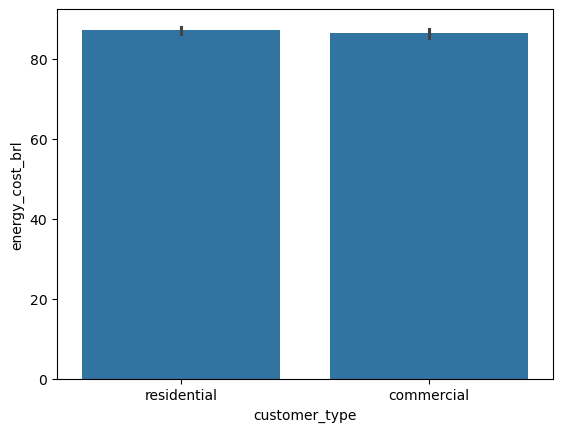

In [73]:
sns.barplot(x = 'customer_type', y = 'energy_cost_brl', data = df)

<Axes: xlabel='regions', ylabel='energy_cost_brl'>

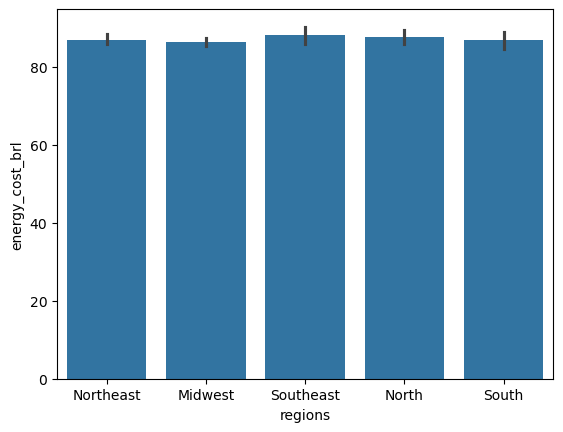

In [75]:
sns.barplot(x = 'regions',y =  'energy_cost_brl', data = df)

<Axes: xlabel='building_size_m2', ylabel='energy_cost_brl'>

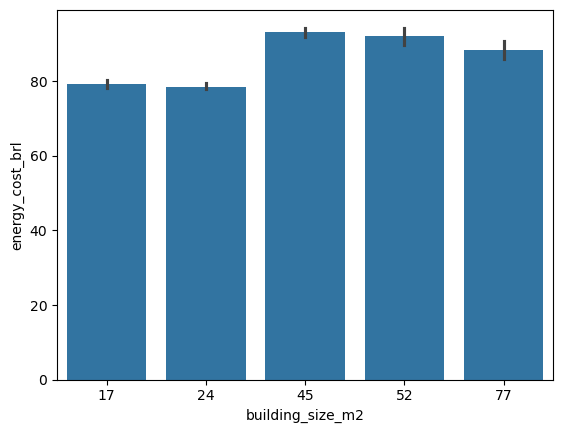

In [77]:
sns.barplot(x = 'building_size_m2',y =  'energy_cost_brl', data = df)

<Axes: xlabel='occupants', ylabel='energy_cost_brl'>

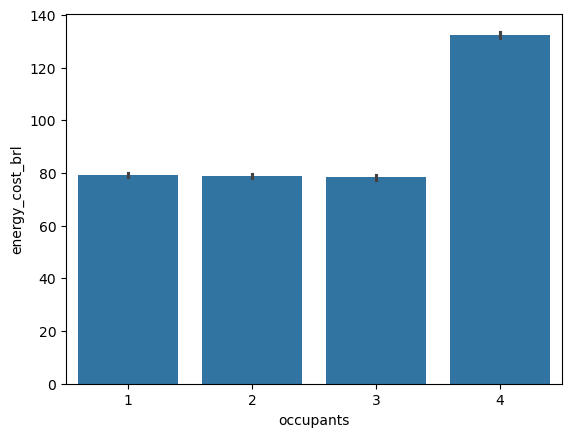

In [79]:
sns.barplot(x = 'occupants',y =  'energy_cost_brl', data = df)

In [175]:
df['customer_type'].unique()

array(['residential', 'commercial'], dtype=object)

In [177]:
df['regions'].unique()

array(['Northeast', 'Midwest', 'Southeast', 'North', 'South'],
      dtype=object)

In [179]:
df['customer_type'] = df['customer_type'].map({'residential':0, 'commercial':1})
df['regions'] = df['regions'].map({'Northeast':0, 'Midwest':1, 'Southeast':2, 'North':3, 'South':4})

In [181]:
df.head()

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,0,0,24,2,64.51
1,CUSTOMER_0002,1,1,24,1,55.26
2,CUSTOMER_0003,1,2,24,1,74.54
3,CUSTOMER_0004,0,0,45,4,147.06
4,CUSTOMER_0005,0,2,45,4,143.06


In [207]:
final_res = []

In [183]:
x = df.drop(['customer_id','energy_cost_brl'], axis =1)
y = df.energy_cost_brl

In [185]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4000, 4) (1000, 4) (4000,) (1000,)


In [187]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [189]:
y_pred_LR = LR.predict(x_test)

In [191]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [209]:
print('Linear Regression :')
print('R2 Score: ',r2_score(y_test,y_pred_LR))
print('Mean Absolute Error', mean_absolute_error(y_test,y_pred_LR))
print('Mean Squared Error', mean_squared_error(y_test,y_pred_LR))
r2_score_LR = r2_score(y_test,y_pred_LR)
final_res.append(r2_score_LR)

Linear Regression :
R2 Score:  0.3112194255768814
Mean Absolute Error 16.295273429730038
Mean Squared Error 403.7380740916147


In [201]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [203]:
y_pred_DT = DT.predict(x_test)

In [211]:
print('Decision Tree :')
print('R2 Score :',r2_score(y_test,y_pred_DT))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred_DT))
r2_score_DT = r2_score(y_test,y_pred_DT)
final_res.append(r2_score_DT)

Decision Tree :
R2 Score : 0.5985059077932764
Mean Absolute Error : 13.195824469417916


In [195]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [197]:
y_pred_RF = RF.predict(x_test)

In [213]:
print('Random Forest :')
print('R2 Score: ',r2_score(y_test,y_pred_RF))
print('Mean Absolute Error', mean_absolute_error(y_test,y_pred_RF))
print('Mean Squared Error', mean_squared_error(y_test,y_pred_RF))
r2_score_RF = r2_score(y_test,y_pred_RF)
final_res.append(r2_score_RF)

Random Forest :
R2 Score:  0.5986759330588525
Mean Absolute Error 13.189137135778465
Mean Squared Error 235.24154410007807


In [215]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [217]:
y_pred_xgb = xgb.predict(x_test)

In [219]:
print('XGBoost :')
print('R2 Score :', r2_score(y_test,y_pred_xgb))
print('Mean Absolute Error :', mean_absolute_error(y_test,y_pred_xgb))
r2_score_xgb = r2_score(y_test,y_pred_xgb)
final_res.append(r2_score_xgb)

XGBoost :
R2 Score : 0.599531008449331
Mean Absolute Error : 13.178186822509765


In [221]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [223]:
y_pred_KNN = KNN.predict(x_test)

In [225]:
print('K-Nearest Neighbors :')
print('R2 Score :', r2_score(y_test,y_pred_KNN))
print(' Mean Absolute Error :', mean_absolute_error(y_test,y_pred_KNN))
r2_score_KNN = r2_score(y_test,y_pred_KNN)
final_res.append(r2_score_KNN)

K-Nearest Neighbors :
R2 Score : 0.5346509231268854
 Mean Absolute Error : 13.798498000000002


In [227]:
from sklearn.ensemble import GradientBoostingRegressor
GBC = GradientBoostingRegressor()
GBC.fit(x_train,y_train)

GradientBoostingRegressor()

In [229]:
y_pred_GBC = GBC.predict(x_test)

In [231]:
print('Gradient Boosting ')
print('R2 Score ',r2_score(y_test,y_pred_GBC))
print(' Mean Absolute Error :', mean_absolute_error(y_test,y_pred_GBC))
acc_GBC = r2_score(y_test,y_pred_GBC)
final_res.append(acc_GBC)

Gradient Boosting 
R2 Score  0.6171681584186721
 Mean Absolute Error : 12.882675513374153


In [233]:
final=np.array(final_res)
result=final.reshape(-1,1)
columns=['R2 Score']
index=['Linear Regression','Decision Tree', 'Random Forest','XGBoost','K-Nearest Neighbors','Gradient Boosting ']
final_result=pd.DataFrame(result,index=index,columns=columns)
final_result.sort_values(by='R2 Score', ascending=False)

,R2 Score
Gradient Boosting,0.617168
XGBoost,0.599531
Random Forest,0.598676
Decision Tree,0.598506
K-Nearest Neighbors,0.534651
Linear Regression,0.311219


In [253]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [249]:
gbr = GradientBoostingRegressor(random_state=42)

In [255]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

grid_gbr = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=3,                  # 5-fold cross-validation
    n_jobs=-1,             # use all CPU cores
    scoring='r2',          # evaluation metric
    verbose=2
)

grid_gbr.fit(x_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=2)

In [257]:
y_pred_gbr = grid_gbr.predict(x_test)

In [259]:
print("R2 Score:", r2_score(y_test,y_pred_gbr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gbr))
r2_score_model_gbr = r2_score(y_test,y_pred_gbr)
mae_model_gbr = mean_absolute_error(y_test,y_pred_gbr)

R2 Score: 0.6171417128446574
Mean Absolute Error: 12.904969358933545


In [237]:
xgb1 = XGBRegressor(random_state=42)
param_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb1,
    param_distributions=param_xgb,
    n_iter=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='r2')

In [239]:
y_pred_xgb = xgb_search.predict(x_test) 

In [241]:
print('R2 Score: ',r2_score(y_test,y_pred_xgb))
print('Mean Absolute Score: ',mean_absolute_error(y_test,y_pred_xgb))
r2_score_model_xgb = r2_score(y_test,y_pred_xgb)
mae_model_xgb = mean_absolute_error(y_test,y_pred_xgb)

R2 Score:  0.6177193075607113
Mean Absolute Score:  12.884149057006834


In [243]:
rf = RandomForestRegressor(random_state=42)

param_rf = {
    'n_estimators': [100, 200, 300, 500],     # Number of trees
    'max_depth': [None, 10, 20, 30, 40],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider per split
    'bootstrap': [True, False]                # Whether bootstrap samples are used
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_rf,
    n_iter=10,       # number of random combinations to try
    cv=3,            # 3-fold cross-validation
    scoring='r2',    # optimize for R²
    n_jobs=-1,       # use all cores
    random_state=42
)

# 4️⃣ Fit the model
rf_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='r2')

In [245]:
y_pred_rf = rf_search.predict(x_test) 

In [261]:
print('R2 Score: ',r2_score(y_test,y_pred_rf))
print('Mean Absolute Score: ',mean_absolute_error(y_test,y_pred_rf))
r2_score_model_rf = r2_score(y_test,y_pred_rf)
mae_model_rf = mean_absolute_error(y_test,y_pred_rf)

R2 Score:  0.6016624122269763
Mean Absolute Score:  13.1517640628834


In [269]:
models_score = pd.DataFrame({'R2 Score':[r2_score_model_gbr,r2_score_model_xgb,r2_score_model_rf],'Mean Absolute Error':[mae_model_gbr,mae_model_xgb,mae_model_rf]}, index=['Gradient Boosting','XGBoost','Random Forest'])
models_score.sort_values(by = 'R2 Score', ascending = False) 

,R2 Score,Mean Absolute Error
XGBoost,0.617719,12.884149
Gradient Boosting,0.617142,12.904969
Random Forest,0.601662,13.151764


After the parameter tuning process with Gradient Boosting,XGBoost and Random Forest I decided to select the XGBoost Model as it gives the least value of Mean Absolute Error as lower value of Mean Absolute Error is better and Higher R2 Score is better.